# Task 1A: Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like loss curve, show confusion matrix, etc. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

**NOTE: The amount of things you can do in this notebook is limitless (hyperbole). But don't do too much at the cost of rest of your tasks. Remember to maintain the outputs while submitting this notebook.**

## Absolutely required items?

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

**NOTE: You may or may not delete these instruction cells after completion of the notebook.**

# Your solution

## 1) Importing libraries and datset

In [1]:
from nnet import model
import torch
import torchvision
import matplotlib.pyplot as plt

from nnet import model




# 2) Dataset Sample Plotting and class distribution


class distribution   : [1 0 0 1 0 1 1]


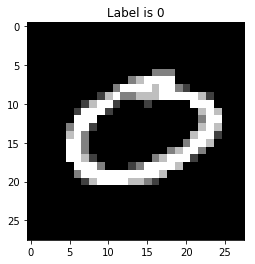

In [2]:
import numpy as np
import matplotlib.pyplot as plt



transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)






for batch_index, (inputs1, labels1) in enumerate(train_loader):   
    sample = inputs1[0][0].numpy();
    label = labels1[0] ;    
    y = labels1.numpy()
    
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(sample , cmap='gray')
    
    
    class_distribution =  np.bincount(y)
    print("class distribution   :", class_distribution)
    break;
    






# 3) Transformation of MNSIT

### Transforming dataset with normalizing and grayscaling  


In [3]:
import torchvision as tv

transform  = tv.transforms.Compose([tv.transforms.Grayscale(num_output_channels=1),
                                    tv.transforms.ToTensor(), 
                                    tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])





# 4)Creating required Dataloaders 

In [4]:
train_dataset = tv.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = tv.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=4, shuffle=True)


# 5) Trainning and Finding Accuracy

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Defining input and output layers to the model

N_in = 28 * 28 
N_h1 = 256 
N_h2 = 256 
N_out = 10 
lr = 0.001
debug = False
N_epoch = 1
# Creating Model

net = model.FullyConnected(N_in, N_h1, N_h2, N_out, device=device)

train_creloss = []
eval_creloss = []

for i in range(N_epoch):

    for batch_index, (inputs1, labels1) in enumerate(train_loader):     
        trainer_input = inputs1.view( inputs1.size(0) , inputs1.size(2)*inputs1.size(3))
        

        creloss, accuracy, outputs=net.train(trainer_input, labels1,lr,debug)
        train_creloss.append(creloss)
        
        if batch_index%4 == 0:
            print("trainning  phase","epoach :",i," ","creloss :",creloss ," ","accuracy :",accuracy)

    for batch_index, (inputs2, labels2) in enumerate(train_loader):
        test_input =  inputs2.view( inputs2.size(0) , inputs2.size(2)*inputs2.size(3))
         
        creloss, accuracy, outputs=net.eval(test_input,labels2,debug)
        eval_creloss.append(creloss) 
        
        print("evaluating  phase","epoach :",i," ","creloss :",creloss ," ","accuracy :",accuracy)


trainning  phase epoach : 0   creloss : 3.7627692222595215   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.8884854316711426   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.569309949874878   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.8624215126037598   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.8480560779571533   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.841944456100464   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.385040283203125   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.671372413635254   accuracy : 0.0
trainning  phase epoach : 0   creloss : 1.8389636278152466   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.6142044067382812   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.444766044616699   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.5739850997924805   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3406693935394287   accuracy : 0.0
trainning  phase

trainning  phase epoach : 0   creloss : 2.658051013946533   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3974480628967285   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.460386276245117   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.808910369873047   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.5852370262145996   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3854806423187256   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.1833016872406006   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3379459381103516   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.593663215637207   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.355487108230591   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2757339477539062   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.387294054031372   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2667412757873535   accuracy : 0.25
trainning  phas

trainning  phase epoach : 0   creloss : 2.4650986194610596   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2295923233032227   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3269166946411133   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.135803461074829   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.368098735809326   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.411649227142334   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.4203543663024902   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.329099655151367   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.469918727874756   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.271606922149658   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.322510242462158   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.4350571632385254   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.4454257488250732   accuracy : 0.0
trainning  ph

trainning  phase epoach : 0   creloss : 2.2747063636779785   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.307488203048706   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.237231731414795   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.265861988067627   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2602710723876953   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.287372589111328   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.4000508785247803   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.254931926727295   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.373380184173584   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3746466636657715   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.4041190147399902   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2364673614501953   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.254558563232422   accuracy : 0.25
trainning  phas

trainning  phase epoach : 0   creloss : 2.3126418590545654   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.238248825073242   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.257545232772827   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2517833709716797   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.4409754276275635   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.312551498413086   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.28214955329895   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.332740545272827   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2450907230377197   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.280463695526123   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.273669719696045   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.355747699737549   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2300920486450195   accuracy : 0.25
trainning  phase 

trainning  phase epoach : 0   creloss : 2.279609203338623   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2735061645507812   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3176729679107666   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2951056957244873   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3003592491149902   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2954635620117188   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.31474232673645   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3576884269714355   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.34411883354187   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.346463203430176   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.322805643081665   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2640228271484375   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2985470294952393   accuracy : 0.25
trainning  pha

trainning  phase epoach : 0   creloss : 2.2897019386291504   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3156728744506836   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2948155403137207   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.26328182220459   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.355214834213257   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2874302864074707   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.2756400108337402   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.27278733253479   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3229310512542725   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.314862012863159   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2940163612365723   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2954986095428467   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.285682201385498   accuracy : 0.0
trainning  ph

trainning  phase epoach : 0   creloss : 2.3173580169677734   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3387255668640137   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2767200469970703   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3057971000671387   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2796874046325684   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3044817447662354   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2692208290100098   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.327629566192627   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3247928619384766   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3174211978912354   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3014228343963623   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2936644554138184   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2831015586853027   accuracy : 0.25
trainnin

trainning  phase epoach : 0   creloss : 2.281244993209839   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.335442066192627   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3419411182403564   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3683228492736816   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.316756248474121   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3108925819396973   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3113889694213867   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.324596405029297   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.253493547439575   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3074135780334473   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.325549840927124   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.316185235977173   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.318185329437256   accuracy : 0.0
trainning  phase e

trainning  phase epoach : 0   creloss : 2.208738327026367   accuracy : 0.75
trainning  phase epoach : 0   creloss : 2.2655327320098877   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3174028396606445   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2690093517303467   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2325901985168457   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3306021690368652   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.31552791595459   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3469882011413574   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.325702428817749   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.307274103164673   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2504866123199463   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3345587253570557   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.31294322013855   accuracy : 0.25
trainning  pha

trainning  phase epoach : 0   creloss : 2.3015146255493164   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.311127185821533   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3398687839508057   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.307771921157837   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3778114318847656   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.348264217376709   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2417428493499756   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.340879201889038   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2725744247436523   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2472240924835205   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.212376117706299   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.364774465560913   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3630118370056152   accuracy : 0.0
trainning  phas

trainning  phase epoach : 0   creloss : 2.3062806129455566   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.292426347732544   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2656197547912598   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2947335243225098   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.298159122467041   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3082361221313477   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3053269386291504   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.291414737701416   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3312668800354004   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.270167350769043   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3424453735351562   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3287479877471924   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.307554244995117   accuracy : 0.0
trainning  ph

trainning  phase epoach : 0   creloss : 2.3273723125457764   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3007564544677734   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3453097343444824   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3297154903411865   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.274083375930786   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3079001903533936   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3004860877990723   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3008768558502197   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2694106101989746   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2797038555145264   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.294768810272217   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.263282537460327   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.330091953277588   accuracy : 0.0
trainning

trainning  phase epoach : 0   creloss : 2.2753398418426514   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2863922119140625   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2205073833465576   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.245880365371704   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2062954902648926   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3094520568847656   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.270021677017212   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2150559425354004   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3109140396118164   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.324125289916992   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.211609125137329   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.323593854904175   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.314680814743042   accuracy : 0.0
trainning  pha

trainning  phase epoach : 0   creloss : 2.291152238845825   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3166916370391846   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2339928150177   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3310670852661133   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3696703910827637   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3038604259490967   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2870068550109863   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.255737066268921   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3240575790405273   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.353612184524536   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2820634841918945   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.173732042312622   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.293229103088379   accuracy : 0.0
trainning  pha

trainning  phase epoach : 0   creloss : 2.3332109451293945   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.28792667388916   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.332210063934326   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.314671039581299   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.29392147064209   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.32466459274292   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3059098720550537   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.30999755859375   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.355720043182373   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3136355876922607   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3171164989471436   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2783708572387695   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2906177043914795   accuracy : 0.25
trainning  phase e

trainning  phase epoach : 0   creloss : 2.292855739593506   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2950639724731445   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3616247177124023   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.31197452545166   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.345724582672119   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3338510990142822   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.254251480102539   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3014612197875977   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3701252937316895   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3141870498657227   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3140828609466553   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3313910961151123   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.277329921722412   accuracy : 0.25
trainning  ph

trainning  phase epoach : 0   creloss : 2.317082643508911   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2680182456970215   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3173046112060547   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3124966621398926   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2813539505004883   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3136277198791504   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.316477060317993   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3078060150146484   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.337688684463501   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.325838565826416   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3203330039978027   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.30229115486145   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2931761741638184   accuracy : 0.25
trainning  phas

trainning  phase epoach : 0   creloss : 2.282679796218872   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.326552391052246   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2766900062561035   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.330773115158081   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.320256233215332   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2900748252868652   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2949061393737793   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.274956226348877   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2815728187561035   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.284238338470459   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.315382719039917   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.315016508102417   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2850584983825684   accuracy : 0.25
trainning  ph

trainning  phase epoach : 0   creloss : 2.3034119606018066   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3159987926483154   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.304229259490967   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.282527446746826   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3032593727111816   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.325735092163086   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3237717151641846   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.321488380432129   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3111190795898438   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.344653606414795   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.333423137664795   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.300347089767456   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.303319215774536   accuracy : 0.25
trainning  phase

trainning  phase epoach : 0   creloss : 2.31559681892395   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2762813568115234   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.30141019821167   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.266124963760376   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.266993761062622   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3109447956085205   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3236703872680664   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.267498731613159   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3103036880493164   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2479963302612305   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3296403884887695   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3241963386535645   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.267815589904785   accuracy : 0.25
trainning  phase 

trainning  phase epoach : 0   creloss : 2.283933401107788   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2780072689056396   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.267167568206787   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.323864221572876   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.302342176437378   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.288715362548828   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.319417953491211   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2864339351654053   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3209972381591797   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.300377607345581   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.269888401031494   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.275254249572754   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2559049129486084   accuracy : 0.25
trainning  pha

trainning  phase epoach : 0   creloss : 2.3216092586517334   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.33137583732605   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.337496042251587   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2915892601013184   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2876908779144287   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.296572685241699   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.366403102874756   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.327310085296631   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2436745166778564   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3508224487304688   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.287679672241211   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2971010208129883   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3461880683898926   accuracy : 0.0
trainning  phas

trainning  phase epoach : 0   creloss : 2.30509614944458   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.363530397415161   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.29721736907959   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2281014919281006   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3078861236572266   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3525731563568115   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3803598880767822   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2734267711639404   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2777132987976074   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.295137643814087   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2337839603424072   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.277225971221924   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.230234146118164   accuracy : 0.0
trainning  phase

trainning  phase epoach : 0   creloss : 2.348074197769165   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.306978940963745   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2810521125793457   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.317124366760254   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2983295917510986   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.195808172225952   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.2950165271759033   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3583357334136963   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2051029205322266   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.315382480621338   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3399882316589355   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.215989589691162   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.2341785430908203   accuracy : 0.5
trainning  phas

trainning  phase epoach : 0   creloss : 2.316361904144287   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2779381275177   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.2726070880889893   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2858126163482666   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.281261920928955   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2386891841888428   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3290255069732666   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2907471656799316   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2894368171691895   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.2307889461517334   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.29087495803833   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.250671863555908   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2634332180023193   accuracy : 0.25
trainning  phase

trainning  phase epoach : 0   creloss : 2.342550039291382   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2646660804748535   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3072714805603027   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2299423217773438   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.346717119216919   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2573606967926025   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2820849418640137   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2803030014038086   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3234965801239014   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.315171003341675   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2607455253601074   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2503838539123535   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3732123374938965   accuracy : 0.0
trainning  

trainning  phase epoach : 0   creloss : 2.256401300430298   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3246922492980957   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3222601413726807   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.270448684692383   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3004839420318604   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2603602409362793   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3479015827178955   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2840468883514404   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.320260763168335   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3518199920654297   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.238554000854492   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.365300178527832   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.324523687362671   accuracy : 0.0
trainning  phas

trainning  phase epoach : 0   creloss : 2.3262898921966553   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.372122287750244   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.274895668029785   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3699843883514404   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3651516437530518   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3138816356658936   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3015010356903076   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2980291843414307   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.29524564743042   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.28812313079834   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3407034873962402   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.246129035949707   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.320500612258911   accuracy : 0.0
trainning  phase

trainning  phase epoach : 0   creloss : 2.2959537506103516   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2589471340179443   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2656543254852295   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.275423049926758   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2781715393066406   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.303941488265991   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.291811943054199   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3052570819854736   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.247291088104248   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3602890968322754   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.359384059906006   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3289241790771484   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3428359031677246   accuracy : 0.0
trainning  ph

trainning  phase epoach : 0   creloss : 2.26082706451416   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.297288179397583   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.351468086242676   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.306624412536621   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.348564624786377   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3039495944976807   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.1712942123413086   accuracy : 0.75
trainning  phase epoach : 0   creloss : 2.3360071182250977   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.297058343887329   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.259204387664795   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.261150598526001   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3574068546295166   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2335002422332764   accuracy : 0.5
trainning  phase 

trainning  phase epoach : 0   creloss : 2.3017938137054443   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2451331615448   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3545968532562256   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2825942039489746   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2670722007751465   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3280587196350098   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2944552898406982   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.289400339126587   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.266631603240967   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.326183795928955   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.1938583850860596   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.2928342819213867   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3301920890808105   accuracy : 0.0
trainning  pha

trainning  phase epoach : 0   creloss : 2.2712509632110596   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.283851385116577   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.235896587371826   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.310626983642578   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.314770221710205   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2544517517089844   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3421857357025146   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3365318775177   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.270979166030884   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3147435188293457   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.253613233566284   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2989938259124756   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3642239570617676   accuracy : 0.0
trainning  phase 

trainning  phase epoach : 0   creloss : 2.2804555892944336   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3047966957092285   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.296696662902832   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.299764633178711   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3262383937835693   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2968859672546387   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.318031072616577   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3006420135498047   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2645647525787354   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.329299211502075   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2737810611724854   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2891342639923096   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.295900583267212   accuracy : 0.0
trainning  phas

trainning  phase epoach : 0   creloss : 2.328608512878418   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.227749824523926   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.295793056488037   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.3098621368408203   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.37556791305542   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2978734970092773   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.2420177459716797   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.3288464546203613   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.1757736206054688   accuracy : 0.5
trainning  phase epoach : 0   creloss : 2.3285436630249023   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.2277069091796875   accuracy : 0.25
trainning  phase epoach : 0   creloss : 2.283052682876587   accuracy : 0.0
trainning  phase epoach : 0   creloss : 2.334395408630371   accuracy : 0.0
trainning  phase

evaluating  phase epoach : 0   creloss : 2.2610936164855957   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3413150310516357   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.276329517364502   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.353058338165283   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.328503131866455   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3122353553771973   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.305063247680664   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2587664127349854   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.241194486618042   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3044915199279785   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2804055213928223   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.306062698364258   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1972618103027344   accuracy : 0.5


evaluating  phase epoach : 0   creloss : 2.336961507797241   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.215508222579956   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3314239978790283   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3501904010772705   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2934796810150146   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2648277282714844   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2367069721221924   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.4033260345458984   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2908148765563965   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.336832046508789   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3253626823425293   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2873668670654297   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.356383800506592   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.334351062774658   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.329514265060425   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.300297260284424   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.306933641433716   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.348376750946045   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2914516925811768   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2924695014953613   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.346276044845581   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.302126407623291   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3309011459350586   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1544625759124756   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.335449695587158   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.328925609588623   accuracy : 0.0
eval

evaluating  phase epoach : 0   creloss : 2.2871756553649902   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.328817844390869   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3133273124694824   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3076353073120117   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.390364408493042   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.288349151611328   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.297675371170044   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.331252336502075   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2335288524627686   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2852578163146973   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.334637403488159   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3341851234436035   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.273038864135742   accuracy : 0.25
eva

evaluating  phase epoach : 0   creloss : 2.350806951522827   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2820329666137695   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.392258882522583   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.420438766479492   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.313697338104248   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2859034538269043   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2101287841796875   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.267104387283325   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.276435613632202   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2699482440948486   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.40421724319458   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.30543851852417   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3127801418304443   accuracy : 0.0
eval

evaluating  phase epoach : 0   creloss : 2.2550151348114014   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3486242294311523   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.253695011138916   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.326404571533203   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.346235990524292   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2927656173706055   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2627930641174316   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.300731897354126   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2724475860595703   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.399146556854248   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3269424438476562   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284684658050537   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3354692459106445   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.3552086353302   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.325528144836426   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.239788770675659   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2783443927764893   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2641401290893555   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2744123935699463   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3484349250793457   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.236085891723633   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3274364471435547   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.337658405303955   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.26111102104187   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3801674842834473   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3313333988189697   accuracy : 0.0
eval

evaluating  phase epoach : 0   creloss : 2.262814521789551   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2758524417877197   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1907947063446045   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.287968158721924   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.410674571990967   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3561363220214844   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.256803035736084   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2662007808685303   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3611562252044678   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3377442359924316   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3115055561065674   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3525962829589844   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.301100254058838   accuracy : 0.0

evaluating  phase epoach : 0   creloss : 2.302250862121582   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2531166076660156   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.383228063583374   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284964084625244   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3244776725769043   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.327609062194824   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2272274494171143   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.319277286529541   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3088631629943848   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.325083017349243   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2911224365234375   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2452478408813477   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.324768543243408   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.1957931518554688   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2568130493164062   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2740347385406494   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3272366523742676   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2625374794006348   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.391226053237915   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.376530170440674   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284567356109619   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3118114471435547   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2357125282287598   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2920007705688477   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.317653179168701   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1677169799804688   accuracy : 0.5


evaluating  phase epoach : 0   creloss : 2.3295154571533203   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.320449113845825   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.351996898651123   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3651883602142334   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2718722820281982   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.25972843170166   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.262495756149292   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3774538040161133   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3152384757995605   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.240370750427246   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.403327703475952   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3260769844055176   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.301168918609619   accuracy : 0.0
evalu

evaluating  phase epoach : 0   creloss : 2.270404100418091   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3136277198791504   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.261502265930176   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.334136962890625   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3508670330047607   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.255841016769409   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3818304538726807   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3064942359924316   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3837180137634277   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.196293354034424   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2617712020874023   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.383166790008545   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.273664951324463   accuracy : 0.25


evaluating  phase epoach : 0   creloss : 2.290210723876953   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.271657943725586   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.285228729248047   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3191096782684326   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.253385066986084   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.216623544692993   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3729538917541504   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2975473403930664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2963201999664307   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3248658180236816   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.272165298461914   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2315590381622314   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3202147483825684   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.3041675090789795   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3495640754699707   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.4020633697509766   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1475815773010254   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.362642288208008   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.33522367477417   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.267202138900757   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.272400379180908   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.282393455505371   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2909224033355713   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3763298988342285   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3148372173309326   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1965255737304688   accuracy : 0.5
e

evaluating  phase epoach : 0   creloss : 2.3110477924346924   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3083412647247314   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3244824409484863   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2914462089538574   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.266368865966797   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2736904621124268   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.285322666168213   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3175618648529053   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.304561138153076   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3088109493255615   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.207597017288208   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2408878803253174   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2995738983154297   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.266145944595337   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3378524780273438   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.215611696243286   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2841124534606934   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.233125686645508   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3684074878692627   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3518636226654053   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.248924732208252   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.323641061782837   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3304591178894043   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.258321523666382   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3046841621398926   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3577990531921387   accuracy : 0.0
eva

evaluating  phase epoach : 0   creloss : 2.3186533451080322   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3499157428741455   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3327994346618652   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2201266288757324   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.254453659057617   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2286124229431152   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1531291007995605   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.3695740699768066   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.349113941192627   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2760977745056152   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.328988552093506   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.264780044555664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2556538581848145   accuracy : 0.2

evaluating  phase epoach : 0   creloss : 2.3405466079711914   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2182083129882812   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.415184259414673   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.392834186553955   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3300061225891113   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.336362361907959   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.355803966522217   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3270459175109863   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.347541093826294   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3515567779541016   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1911849975585938   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3556923866271973   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3141937255859375   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.3269946575164795   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3241052627563477   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.329080820083618   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2635419368743896   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3592944145202637   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.287280559539795   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.308877468109131   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.281782627105713   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.236074447631836   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3185043334960938   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.348623514175415   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3082265853881836   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.343614339828491   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.301571846008301   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.312204122543335   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2934160232543945   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2232656478881836   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2682979106903076   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2903497219085693   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.302708864212036   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3093738555908203   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.288363218307495   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.351060390472412   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3267011642456055   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2935590744018555   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3600387573242188   accuracy : 0.0

evaluating  phase epoach : 0   creloss : 2.290475845336914   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3418970108032227   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3427634239196777   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2576615810394287   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.239058017730713   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.257993459701538   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3245739936828613   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295301914215088   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2571661472320557   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.311583995819092   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2797107696533203   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.311572551727295   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3278260231018066   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.3560869693756104   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3023595809936523   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.341336250305176   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.34737491607666   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2448527812957764   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2305145263671875   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.242335796356201   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2715725898742676   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.285353660583496   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2200405597686768   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1783201694488525   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2687835693359375   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.330631732940674   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.3021368980407715   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.277132034301758   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3207123279571533   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.270395278930664   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2188620567321777   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.306542158126831   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.275580644607544   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.331958770751953   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3319008350372314   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3045382499694824   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.258701801300049   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.215702772140503   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.353900194168091   accuracy : 0.0
eva

evaluating  phase epoach : 0   creloss : 2.3832597732543945   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2678401470184326   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2943334579467773   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.333139419555664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.304802417755127   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3281874656677246   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295243263244629   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2372517585754395   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.227121353149414   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.284280300140381   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3261489868164062   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.331882953643799   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2554805278778076   accuracy : 0.25
ev

evaluating  phase epoach : 0   creloss : 2.2019619941711426   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.38210129737854   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.329131603240967   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3327431678771973   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.344369411468506   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2852306365966797   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3957271575927734   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3192906379699707   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.328677177429199   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3556466102600098   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.352105140686035   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2267372608184814   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2843518257141113   accuracy : 0.25
e

evaluating  phase epoach : 0   creloss : 2.2800939083099365   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2859387397766113   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.27658748626709   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.366694688796997   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2709896564483643   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2325215339660645   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3083572387695312   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3476109504699707   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.319913625717163   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.351026773452759   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2814414501190186   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.334623336791992   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.346158027648926   accuracy : 0.0
eva

evaluating  phase epoach : 0   creloss : 2.3269896507263184   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2824416160583496   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2848968505859375   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.303605794906616   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2178359031677246   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3474314212799072   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2843985557556152   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3857452869415283   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2895114421844482   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2390055656433105   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2560245990753174   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2505369186401367   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2492241859436035   accuracy 

evaluating  phase epoach : 0   creloss : 2.2166996002197266   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.341926097869873   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.243563413619995   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.310533046722412   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3599207401275635   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284864902496338   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3091845512390137   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2908709049224854   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.257448434829712   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2695045471191406   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.373492479324341   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.263216018676758   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2872812747955322   accuracy : 0.25
e

evaluating  phase epoach : 0   creloss : 2.3340892791748047   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3229551315307617   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2769863605499268   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2572503089904785   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.198885679244995   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.242516279220581   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2631149291992188   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1672561168670654   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3288583755493164   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3088111877441406   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3161234855651855   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.356844902038574   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3699212074279785   accuracy : 0.0

evaluating  phase epoach : 0   creloss : 2.305178642272949   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3117074966430664   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2348124980926514   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3343770503997803   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3495302200317383   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2212440967559814   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.322539806365967   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.30530047416687   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.325690269470215   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2522470951080322   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.286799192428589   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2969765663146973   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3294389247894287   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.363370656967163   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3483996391296387   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.32690167427063   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3050217628479004   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2151803970336914   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.323162078857422   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.351897716522217   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2144336700439453   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2755308151245117   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2847235202789307   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.243377208709717   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.283032178878784   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2441697120666504   accuracy : 0.25


evaluating  phase epoach : 0   creloss : 2.306584358215332   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.324010133743286   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3311476707458496   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3038389682769775   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3212380409240723   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.280344009399414   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.217303514480591   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2842040061950684   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2541098594665527   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3105523586273193   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2308945655822754   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2002837657928467   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.3463833332061768   accuracy : 0

evaluating  phase epoach : 0   creloss : 2.3026816844940186   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.239497661590576   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.191304922103882   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3076133728027344   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.354464530944824   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.321396589279175   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2684402465820312   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.357387065887451   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2885098457336426   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2456254959106445   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2337827682495117   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3587918281555176   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3420965671539307   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.3291890621185303   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2824177742004395   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284806489944458   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3346807956695557   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2903225421905518   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3361449241638184   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2309482097625732   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3323612213134766   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2783408164978027   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.325680732727051   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.34433913230896   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2591233253479004   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3345911502838135   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.325129985809326   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.271451950073242   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2804694175720215   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.305042266845703   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3054776191711426   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2812304496765137   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.280251979827881   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.258578062057495   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2614805698394775   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.275820016860962   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.306209087371826   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3216195106506348   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.348473072052002   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.317664623260498   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2025840282440186   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.256528615951538   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2734079360961914   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.158961296081543   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.2941086292266846   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.390455484390259   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.341933250427246   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3490116596221924   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.293123245239258   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3702139854431152   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.321051597595215   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2924678325653076   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.2461860179901123   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2749764919281006   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.28143310546875   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3619000911712646   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.356191396713257   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.363471031188965   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.293447494506836   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.280482769012451   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2161471843719482   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2853403091430664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.256600856781006   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.148940086364746   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.348437547683716   accuracy : 0.0
evalu

evaluating  phase epoach : 0   creloss : 2.2911367416381836   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3323872089385986   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.323364019393921   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.292113780975342   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2272863388061523   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.287571907043457   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295046806335449   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.349907875061035   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3317229747772217   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3219456672668457   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.42240309715271   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3233156204223633   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2772109508514404   accuracy : 0.25
eva

evaluating  phase epoach : 0   creloss : 2.3305442333221436   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.322711944580078   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2388758659362793   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.271087169647217   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.255540370941162   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.253242254257202   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.323976993560791   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.152395725250244   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.321039915084839   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3797574043273926   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2689428329467773   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.282170057296753   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.323883533477783   accuracy : 0.0
eval

evaluating  phase epoach : 0   creloss : 2.322300434112549   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1946120262145996   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2615513801574707   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3517775535583496   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3902435302734375   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2795963287353516   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.4317381381988525   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3083996772766113   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.259528160095215   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3173294067382812   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2423760890960693   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.4389851093292236   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.332432985305786   accuracy : 0.0

evaluating  phase epoach : 0   creloss : 2.3505566120147705   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.353286027908325   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.252005100250244   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2020866870880127   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3619048595428467   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2909247875213623   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.330195903778076   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2911107540130615   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3271028995513916   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.24021053314209   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.20291805267334   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.400498867034912   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.245716094970703   accuracy : 0.5
evalu

evaluating  phase epoach : 0   creloss : 2.2931509017944336   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3083174228668213   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.317627191543579   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3164942264556885   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.352846384048462   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.349132537841797   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.325028896331787   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.348050355911255   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.272919178009033   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.221362590789795   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3944249153137207   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.275906801223755   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.286827802658081   accuracy : 0.25
eval

evaluating  phase epoach : 0   creloss : 2.2723875045776367   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3563811779022217   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2818639278411865   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3080317974090576   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3042259216308594   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.317847728729248   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3602304458618164   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2265560626983643   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.308107376098633   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2612202167510986   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1860785484313965   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.265645742416382   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3000705242156982   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.129481554031372   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.296429395675659   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3364038467407227   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3273048400878906   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2958738803863525   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3762006759643555   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2811851501464844   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.276092529296875   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.251488447189331   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.324995994567871   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3711676597595215   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.308734655380249   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.22654390335083   accuracy : 0.5
evalu

evaluating  phase epoach : 0   creloss : 2.292104482650757   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2928338050842285   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2801871299743652   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2684335708618164   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.349142551422119   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3568286895751953   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2706289291381836   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2290878295898438   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.349985122680664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2745299339294434   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.357860565185547   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2213196754455566   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3642468452453613   accuracy : 0.0

evaluating  phase epoach : 0   creloss : 2.3088269233703613   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.359203815460205   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.365341901779175   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.258988618850708   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2983474731445312   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.270551919937134   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3222103118896484   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2538564205169678   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.278229236602783   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.349250316619873   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2424511909484863   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.309628963470459   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3687119483947754   accuracy : 0.0

evaluating  phase epoach : 0   creloss : 2.2477071285247803   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3103513717651367   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.287480115890503   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2623462677001953   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2776951789855957   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3071727752685547   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3090996742248535   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.307209014892578   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.284430503845215   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2137441635131836   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2504920959472656   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2413156032562256   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3541951179504395   accuracy :

evaluating  phase epoach : 0   creloss : 2.3049304485321045   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2978453636169434   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.296074867248535   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2839746475219727   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.350872039794922   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2425472736358643   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2324020862579346   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.216437816619873   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2469706535339355   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2783138751983643   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3133912086486816   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.356569766998291   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2869129180908203   accuracy : 

evaluating  phase epoach : 0   creloss : 2.284376621246338   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.298469305038452   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.331956386566162   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.317697525024414   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2843680381774902   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2795252799987793   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.224724292755127   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.285431385040283   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2376866340637207   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3085789680480957   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2585391998291016   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3846118450164795   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.330259084701538   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.254422903060913   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3199615478515625   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2813684940338135   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3876872062683105   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2865066528320312   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.214639186859131   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.294135808944702   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3353023529052734   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.289581060409546   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.294565439224243   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.307554244995117   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3694472312927246   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.334789276123047   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.370404005050659   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.308027505874634   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.307936429977417   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.250993251800537   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.279182195663452   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.32973051071167   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3572921752929688   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.181299924850464   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2601170539855957   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2938966751098633   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2514679431915283   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.344451665878296   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.280951738357544   accuracy : 0.0
evaluat

evaluating  phase epoach : 0   creloss : 2.2870519161224365   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.356240749359131   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.290289878845215   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.258126735687256   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2130823135375977   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3504114151000977   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3069705963134766   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2906875610351562   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.335906505584717   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3699774742126465   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.279791831970215   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.285698175430298   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1777453422546387   accuracy : 0.5


evaluating  phase epoach : 0   creloss : 2.3999180793762207   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2252278327941895   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3137519359588623   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2634384632110596   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2435495853424072   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3001434803009033   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.245577573776245   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2740869522094727   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.311394214630127   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2444214820861816   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2975659370422363   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.271240472793579   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1936473846435547   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.240471601486206   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.360299587249756   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.285790205001831   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.32578182220459   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.325153350830078   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2835004329681396   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.270564079284668   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2156457901000977   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.328990936279297   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3557817935943604   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.349609851837158   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.267127275466919   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.33357310295105   accuracy : 0.0
evaluati

evaluating  phase epoach : 0   creloss : 2.227479934692383   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.273714065551758   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2642526626586914   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3085758686065674   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2834250926971436   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.327871322631836   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3948137760162354   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1875123977661133   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2673425674438477   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.304821729660034   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2884738445281982   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.318160057067871   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.326192855834961   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.339822292327881   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.263854742050171   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.303010940551758   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.308155059814453   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1989307403564453   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3287320137023926   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.308957099914551   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.28436279296875   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2655129432678223   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.328432321548462   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.323507070541382   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3054258823394775   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2548956871032715   accuracy : 0.25
eva

evaluating  phase epoach : 0   creloss : 2.256985664367676   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.309216022491455   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.261975049972534   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1902687549591064   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3312015533447266   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3028552532196045   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3247973918914795   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.257612466812134   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.234868288040161   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.304375648498535   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3710713386535645   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.300708293914795   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2340614795684814   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.266359806060791   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2872121334075928   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2329392433166504   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3630032539367676   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2590174674987793   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.314887046813965   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.29406476020813   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3181440830230713   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.292558193206787   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1861941814422607   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2866649627685547   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.263859272003174   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2741193771362305   accuracy : 0.25

evaluating  phase epoach : 0   creloss : 2.272907018661499   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.32080340385437   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.279191255569458   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2681782245635986   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3659729957580566   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3000645637512207   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2819364070892334   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.286432981491089   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3406729698181152   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.319183588027954   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.244596481323242   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2621307373046875   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3115432262420654   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.2895491123199463   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3623805046081543   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2177867889404297   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2610161304473877   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3536691665649414   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3115196228027344   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.305032968521118   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3200535774230957   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3076534271240234   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.379983425140381   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2691025733947754   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3677921295166016   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3763561248779297   accuracy : 0.25

evaluating  phase epoach : 0   creloss : 2.282155990600586   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2810192108154297   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3417820930480957   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2772955894470215   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2619502544403076   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.32392954826355   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2925851345062256   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2817022800445557   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.329390048980713   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3330562114715576   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.241089344024658   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2456300258636475   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2617697715759277   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.221940755844116   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2690658569335938   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2575533390045166   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2557592391967773   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3184022903442383   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.30257248878479   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.373197078704834   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.31268310546875   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2558135986328125   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.288149833679199   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.353856086730957   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3657407760620117   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2494595050811768   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.32476544380188   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.265230655670166   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.243208408355713   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.290609121322632   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.347625732421875   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3141937255859375   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3190674781799316   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2400665283203125   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1954147815704346   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3137013912200928   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3311800956726074   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2925305366516113   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.299699068069458   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.2572126388549805   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.30043888092041   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2492361068725586   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2301392555236816   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.298272132873535   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2978696823120117   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.282259702682495   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2996389865875244   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.282667636871338   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2931265830993652   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.260159730911255   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2970433235168457   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.316262722015381   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.2723562717437744   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2684378623962402   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.248040199279785   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3121678829193115   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.270467519760132   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.203240394592285   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2927865982055664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3703341484069824   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.240851640701294   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.289320945739746   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2944416999816895   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.318283796310425   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.290677547454834   accuracy : 0.2

evaluating  phase epoach : 0   creloss : 2.3592467308044434   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.309128761291504   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.300532341003418   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3621320724487305   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.355393648147583   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.22015380859375   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.207892894744873   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2582595348358154   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.175358772277832   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.237687587738037   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.288893699645996   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.261122226715088   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3101532459259033   accuracy : 0.0
evalu

evaluating  phase epoach : 0   creloss : 2.3559861183166504   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.291672706604004   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.311490535736084   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.260615587234497   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2330079078674316   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2826671600341797   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3011162281036377   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2665176391601562   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3491296768188477   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3261048793792725   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.297952651977539   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.361351251602173   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3309905529022217   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.3021769523620605   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3158504962921143   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2900314331054688   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2780561447143555   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.151336193084717   accuracy : 0.75
evaluating  phase epoach : 0   creloss : 2.264009952545166   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3092551231384277   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3980112075805664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3502936363220215   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2395200729370117   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2389109134674072   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.372476100921631   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2847795486450195   accuracy : 0.

evaluating  phase epoach : 0   creloss : 2.2539639472961426   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.324265956878662   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3102452754974365   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3789565563201904   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.312190532684326   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3417019844055176   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.351311683654785   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.1737098693847656   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.243201732635498   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3157057762145996   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3557214736938477   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295461416244507   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2682111263275146   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.2611284255981445   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.314039707183838   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.287580966949463   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3018579483032227   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3505682945251465   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3572659492492676   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2967400550842285   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.329061985015869   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3264875411987305   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2414817810058594   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3588452339172363   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.254775047302246   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2233338356018066   accuracy : 0

evaluating  phase epoach : 0   creloss : 2.3593692779541016   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2806735038757324   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3597300052642822   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.28202223777771   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2197649478912354   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3432745933532715   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.351989269256592   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2772023677825928   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.335590362548828   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.338468074798584   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284341335296631   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2852392196655273   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3761672973632812   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.2593777179718018   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.377884864807129   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3129634857177734   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295992136001587   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.330030918121338   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.344362258911133   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2923803329467773   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1938576698303223   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3640239238739014   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3214964866638184   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.240201234817505   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3784475326538086   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3559651374816895   accuracy : 0.0


evaluating  phase epoach : 0   creloss : 2.3160665035247803   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3066482543945312   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.395059585571289   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2750308513641357   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3214898109436035   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2217960357666016   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.233376979827881   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3655505180358887   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2651889324188232   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.313488483428955   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3002328872680664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3259470462799072   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.254575252532959   accuracy : 0.0
e

evaluating  phase epoach : 0   creloss : 2.23677921295166   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.29941463470459   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2681376934051514   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3658955097198486   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2265162467956543   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2250778675079346   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.1939353942871094   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3085758686065674   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284555435180664   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3161187171936035   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.264983892440796   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3062188625335693   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2294862270355225   accuracy : 0.5
ev

evaluating  phase epoach : 0   creloss : 2.3885512351989746   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.285174608230591   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2306604385375977   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3315038681030273   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3326659202575684   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2868714332580566   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2152187824249268   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.307374954223633   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3038992881774902   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.332430601119995   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2640256881713867   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2799041271209717   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3925533294677734   accuracy : 0

evaluating  phase epoach : 0   creloss : 2.345449924468994   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2433855533599854   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.266018867492676   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.220388412475586   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3053030967712402   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295477867126465   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.4017558097839355   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.299060821533203   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.251946210861206   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.33012056350708   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.264514446258545   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.264125347137451   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2573046684265137   accuracy : 0.25
ev

evaluating  phase epoach : 0   creloss : 2.2252464294433594   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3068771362304688   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.218040943145752   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.280503034591675   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3566665649414062   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.283777952194214   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.333498239517212   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3537938594818115   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1958069801330566   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.240443706512451   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.282750129699707   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.342365264892578   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2774295806884766   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.3154373168945312   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2399752140045166   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.29354190826416   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.279391288757324   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3840441703796387   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.207369804382324   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3132519721984863   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3040542602539062   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2644999027252197   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2275938987731934   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3114335536956787   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3326244354248047   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2171621322631836   accuracy : 0.2

evaluating  phase epoach : 0   creloss : 2.348522186279297   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.284496307373047   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.203805446624756   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.335145950317383   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2653892040252686   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2147645950317383   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3180043697357178   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2099223136901855   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.261082172393799   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3390657901763916   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295941114425659   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3274037837982178   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2336318492889404   accuracy : 0.25

evaluating  phase epoach : 0   creloss : 2.2598252296447754   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3087148666381836   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3014440536499023   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3060452938079834   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3274710178375244   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.278445243835449   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3240275382995605   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2895851135253906   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.322883129119873   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2493996620178223   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2757492065429688   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.176424503326416   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.246185541152954   accuracy : 0.25

evaluating  phase epoach : 0   creloss : 2.3044681549072266   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2783522605895996   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.363142251968384   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.313877582550049   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.297027111053467   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.175924301147461   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3031084537506104   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.240858316421509   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.2832846641540527   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.4095568656921387   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.277824640274048   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3102478981018066   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2625768184661865   accuracy : 0.25
e

evaluating  phase epoach : 0   creloss : 2.381821632385254   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.331700563430786   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.274170398712158   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2770771980285645   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2511136531829834   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2649295330047607   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3003296852111816   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3389267921447754   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.24155592918396   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3742432594299316   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.244048833847046   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.293684720993042   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.265871047973633   accuracy : 0.5
e

evaluating  phase epoach : 0   creloss : 2.37644624710083   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3049588203430176   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2852635383605957   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.350172758102417   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3904950618743896   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2724061012268066   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2819464206695557   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2365119457244873   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3476879596710205   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3307700157165527   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.350015163421631   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2838337421417236   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.1875150203704834   accuracy : 0.25

evaluating  phase epoach : 0   creloss : 2.367964029312134   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2490172386169434   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3990323543548584   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.301699638366699   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.28464412689209   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.277632236480713   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2525079250335693   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.324082851409912   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3680171966552734   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3243024349212646   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.360896348953247   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.270169734954834   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2650671005249023   accuracy : 0.25
ev

evaluating  phase epoach : 0   creloss : 2.3221940994262695   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.333533763885498   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3518483638763428   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2071590423583984   accuracy : 0.5
evaluating  phase epoach : 0   creloss : 2.3120758533477783   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3034415245056152   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.216087818145752   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.302349328994751   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2705764770507812   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3296701908111572   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2720377445220947   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.321575403213501   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.313239336013794   accuracy : 0.0
ev

evaluating  phase epoach : 0   creloss : 2.3174710273742676   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.392294406890869   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2677927017211914   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.3388547897338867   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3607089519500732   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3847885131835938   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.295926809310913   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2889950275421143   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.373511552810669   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.313807249069214   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.310882329940796   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.2147536277770996   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.2708182334899902   accuracy : 0.25
e

evaluating  phase epoach : 0   creloss : 2.3089823722839355   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.350991725921631   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.308976650238037   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.344266891479492   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.3493924140930176   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.349612236022949   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.218592643737793   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.261756181716919   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.288280725479126   accuracy : 0.25
evaluating  phase epoach : 0   creloss : 2.341672897338867   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.4380569458007812   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.336827516555786   accuracy : 0.0
evaluating  phase epoach : 0   creloss : 2.282566547393799   accuracy : 0.25
evalu

# 6) Plotting the **loss curve for both train and validation phase**

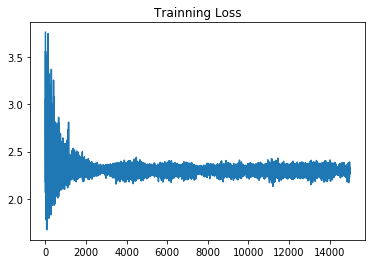

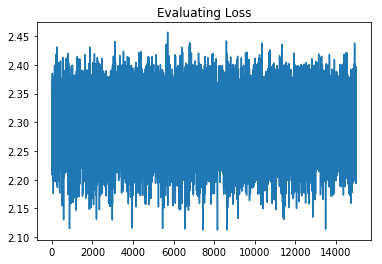

In [6]:

loss = np.array(train_creloss)
plt.title('Trainning Loss')
plt.plot(loss)
plt.show()


loss = np.array(eval_creloss)
plt.title('Evaluating Loss')
plt.plot(loss)
plt.show()



# 7)  Picking some manual random images from test dataset and predicting

In [7]:
for batch_index, (inputs1, labels1) in enumerate(test_loader):     
        tester_input = inputs1.view( inputs1.size(0) , inputs1.size(2)*inputs1.size(3))        
        score, idx=net.predict(tester_input)
        print("predicted :", score,"  Actual :",  idx)

predicted : tensor([0.1204, 0.1206, 0.1210, 0.1199])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1177, 0.1189, 0.1196, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1197, 0.1184, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1196, 0.1179, 0.1185, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1189, 0.1194, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1178, 0.1188, 0.1177, 0.1207])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1198, 0.1184, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1201, 0.1184, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1191, 0.1191, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1189, 0.1191, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1189, 0.1195, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1201, 0.1189, 0.1209, 0.1194])   Actual : t

predicted : tensor([0.1181, 0.1187, 0.1189, 0.1183])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1188, 0.1191, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1203, 0.1197, 0.1184, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1211, 0.1208, 0.1192, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1211, 0.1185, 0.1188, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1204, 0.1191, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1178, 0.1192, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1204, 0.1197, 0.1180])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1186, 0.1189, 0.1175])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1197, 0.1200, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1186, 0.1192, 0.1207])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1179, 0.1179, 0.1191])   Actual : t

predicted : tensor([0.1196, 0.1181, 0.1189, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1198, 0.1210, 0.1181, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1207, 0.1207, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1190, 0.1181, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1201, 0.1185, 0.1193, 0.1195])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1191, 0.1208, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1195, 0.1195, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1176, 0.1179, 0.1206, 0.1212])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1212, 0.1193, 0.1206, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1200, 0.1179, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1177, 0.1201, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1203, 0.1183, 0.1190, 0.1202])   Actual : t

predicted : tensor([0.1197, 0.1196, 0.1192, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1184, 0.1195, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1183, 0.1192, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1186, 0.1194, 0.1203])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1179, 0.1187, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1176, 0.1206, 0.1202])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1181, 0.1204, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1183, 0.1194, 0.1177])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1194, 0.1189, 0.1212])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1203, 0.1197, 0.1192, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1212, 0.1200, 0.1188, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1194, 0.1179, 0.1178])   Actual : t

predicted : tensor([0.1199, 0.1202, 0.1199, 0.1200])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1195, 0.1207, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1193, 0.1186, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1200, 0.1192, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1196, 0.1193, 0.1214])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1183, 0.1182, 0.1206])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1177, 0.1210, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1180, 0.1202, 0.1208])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1211, 0.1191, 0.1191, 0.1169])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1197, 0.1198, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1186, 0.1190, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1199, 0.1194, 0.1194, 0.1186])   Actual : t

predicted : tensor([0.1190, 0.1175, 0.1205, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1176, 0.1194, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1185, 0.1186, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1179, 0.1191, 0.1191, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1197, 0.1169, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1186, 0.1209, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1204, 0.1182, 0.1180])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1184, 0.1192, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1192, 0.1187, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1195, 0.1196, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1172, 0.1193, 0.1209, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1207, 0.1187, 0.1210])   Actual : t

predicted : tensor([0.1204, 0.1186, 0.1178, 0.1212])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1206, 0.1185, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1188, 0.1189, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1193, 0.1204, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1200, 0.1179, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1194, 0.1203, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1209, 0.1193, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1194, 0.1189, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1194, 0.1184, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1194, 0.1182, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1192, 0.1192, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1185, 0.1170, 0.1189])   Actual : t

predicted : tensor([0.1181, 0.1203, 0.1188, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1196, 0.1186, 0.1194, 0.1207])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1200, 0.1205, 0.1200])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1200, 0.1206, 0.1182, 0.1200])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1212, 0.1181, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1190, 0.1180, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1190, 0.1191, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1188, 0.1186, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1204, 0.1177, 0.1204])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1205, 0.1188, 0.1196, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1194, 0.1186, 0.1177])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1192, 0.1197, 0.1182])   Actual : t

predicted : tensor([0.1193, 0.1188, 0.1193, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1187, 0.1201, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1200, 0.1194, 0.1207])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1205, 0.1191, 0.1209])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1185, 0.1189, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1212, 0.1191, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1189, 0.1198, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1190, 0.1191, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1205, 0.1184, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1185, 0.1187, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1177, 0.1195, 0.1183])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1198, 0.1194, 0.1195, 0.1179])   Actual : t

predicted : tensor([0.1197, 0.1211, 0.1186, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1176, 0.1201, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1191, 0.1185, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1198, 0.1198, 0.1181, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1192, 0.1190, 0.1203])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1189, 0.1196, 0.1200])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1207, 0.1196, 0.1189, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1194, 0.1188, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1196, 0.1188, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1200, 0.1188, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1207, 0.1182, 0.1196, 0.1178])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1211, 0.1196, 0.1200])   Actual : t

predicted : tensor([0.1192, 0.1192, 0.1193, 0.1211])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1182, 0.1198, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1198, 0.1211, 0.1207])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1201, 0.1177, 0.1199, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1193, 0.1194, 0.1195])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1209, 0.1203, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1206, 0.1202, 0.1190, 0.1195])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1190, 0.1188, 0.1199])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1194, 0.1175, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1200, 0.1200, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1192, 0.1206, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1210, 0.1181, 0.1189, 0.1186])   Actual : t

predicted : tensor([0.1193, 0.1185, 0.1191, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1189, 0.1191, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1180, 0.1189, 0.1184, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1211, 0.1185, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1185, 0.1186, 0.1187, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1187, 0.1182, 0.1211])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1206, 0.1194, 0.1198, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1204, 0.1185, 0.1180, 0.1205])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1199, 0.1199, 0.1192, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1208, 0.1202, 0.1181, 0.1201])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1187, 0.1195, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1209, 0.1184, 0.1186, 0.1187])   Actual : t

predicted : tensor([0.1181, 0.1189, 0.1200, 0.1202])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1205, 0.1204, 0.1193, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1198, 0.1192, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1186, 0.1175, 0.1175])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1207, 0.1210, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1200, 0.1183, 0.1191, 0.1183])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1182, 0.1197, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1212, 0.1183, 0.1182, 0.1203])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1195, 0.1183, 0.1195])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1191, 0.1190, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1189, 0.1207, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1183, 0.1188, 0.1195])   Actual : t

predicted : tensor([0.1208, 0.1180, 0.1183, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1202, 0.1177, 0.1178])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1203, 0.1184, 0.1202, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1194, 0.1196, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1192, 0.1190, 0.1204])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1180, 0.1180, 0.1203, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1185, 0.1200, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1189, 0.1189, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1182, 0.1183, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1185, 0.1194, 0.1189, 0.1188])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1206, 0.1188, 0.1196, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1204, 0.1192, 0.1200])   Actual : t

predicted : tensor([0.1195, 0.1184, 0.1180, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1187, 0.1204, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1185, 0.1205, 0.1188, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1207, 0.1173, 0.1182, 0.1195])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1173, 0.1184, 0.1200, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1198, 0.1187, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1189, 0.1194, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1191, 0.1189, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1208, 0.1192, 0.1206, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1185, 0.1187, 0.1188, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1178, 0.1187, 0.1185, 0.1199])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1191, 0.1196, 0.1191])   Actual : t

predicted : tensor([0.1201, 0.1195, 0.1183, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1192, 0.1197, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1205, 0.1188, 0.1197, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1211, 0.1194, 0.1198, 0.1210])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1183, 0.1188, 0.1199])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1208, 0.1183, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1185, 0.1198, 0.1197, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1196, 0.1196, 0.1185, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1214, 0.1186, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1198, 0.1183, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1187, 0.1213, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1206, 0.1189, 0.1178, 0.1193])   Actual : t

predicted : tensor([0.1195, 0.1188, 0.1205, 0.1179])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1184, 0.1190, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1203, 0.1190, 0.1191, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1209, 0.1194, 0.1209, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1188, 0.1191, 0.1208, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1184, 0.1205, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1185, 0.1202, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1178, 0.1184, 0.1207])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1192, 0.1196, 0.1210])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1208, 0.1204, 0.1201])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1205, 0.1187, 0.1196])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1190, 0.1191, 0.1188])   Actual : t

predicted : tensor([0.1198, 0.1189, 0.1181, 0.1183])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1203, 0.1193, 0.1195, 0.1206])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1185, 0.1188, 0.1190, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1197, 0.1188, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1200, 0.1176, 0.1198])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1212, 0.1194, 0.1182, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1205, 0.1199, 0.1189, 0.1206])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1200, 0.1202, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1211, 0.1205, 0.1193, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1198, 0.1191, 0.1207, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1187, 0.1186, 0.1199])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1211, 0.1194, 0.1193, 0.1199])   Actual : t

predicted : tensor([0.1187, 0.1189, 0.1183, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1201, 0.1184, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1195, 0.1187, 0.1183])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1184, 0.1185, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1189, 0.1197, 0.1185])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1191, 0.1185, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1186, 0.1199, 0.1202, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1202, 0.1209, 0.1186, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1180, 0.1192, 0.1180])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1204, 0.1193, 0.1185, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1183, 0.1196, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1200, 0.1198, 0.1195])   Actual : t

predicted : tensor([0.1195, 0.1208, 0.1199, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1206, 0.1189, 0.1177, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1187, 0.1186, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1191, 0.1191, 0.1187, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1176, 0.1212, 0.1176, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1189, 0.1212, 0.1191, 0.1200])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1191, 0.1188, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1201, 0.1183, 0.1212, 0.1201])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1204, 0.1185, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1187, 0.1193, 0.1182])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1194, 0.1185, 0.1194, 0.1199])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1187, 0.1194, 0.1197, 0.1178])   Actual : t

predicted : tensor([0.1184, 0.1186, 0.1212, 0.1189])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1182, 0.1193, 0.1187, 0.1210])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1197, 0.1205, 0.1209, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1185, 0.1182, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1214, 0.1188, 0.1191, 0.1194])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1185, 0.1184, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1204, 0.1188, 0.1208, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1204, 0.1184, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1189, 0.1195, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1193, 0.1180, 0.1194, 0.1181])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1193, 0.1210, 0.1197])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1190, 0.1186, 0.1182, 0.1210])   Actual : t

predicted : tensor([0.1185, 0.1198, 0.1190, 0.1193])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1206, 0.1185, 0.1181, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1199, 0.1204, 0.1190])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1196, 0.1188, 0.1187, 0.1191])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1192, 0.1187, 0.1208, 0.1192])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1210, 0.1204, 0.1181, 0.1201])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1179, 0.1203, 0.1189, 0.1195])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1195, 0.1192, 0.1189, 0.1186])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1183, 0.1173, 0.1184, 0.1184])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1196, 0.1196, 0.1191, 0.1172])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1184, 0.1208, 0.1191, 0.1187])   Actual : tensor([1, 1, 1, 1])
predicted : tensor([0.1181, 0.1193, 0.1183, 0.1184])   Actual : t

predicted : tensor([0.1190, 0.1191, 0.1191, 0.1191])   Actual : tensor([1, 1, 1, 1])
